In [1]:
import pandas as pd 
import numpy as np 
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sn

In [11]:
big5 = pd.read_csv(r"C:\Users\Sanjay Sane\Cases of Factor Analysis\Big 5\data-final.csv",
                  sep="\t")
big5.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [12]:
big5.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

In [13]:
big5.shape

(1015341, 110)

In [14]:
big5 = big5.iloc[:,:50]
big5.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')

In [15]:
big5.shape

(1015341, 50)

In [16]:
big5.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [20]:
big5.isnull().sum().sum()

89150

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imp_big5 = imputer.fit_transform(big5)
imp_big5.shape

(1015341, 50)

In [23]:
imp_big5 = pd.DataFrame(imp_big5, columns=big5.columns)
imp_big5.isnull().sum().sum()

0

# Bartlett's Test of Adequacy

In [25]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(imp_big5)
chi_square_value, p_value 

(19022858.933331475, 0.0)

# KMO

In [27]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(imp_big5)
kmo_model 

0.9062967030184974

In [28]:
fa = FactorAnalyzer()
fa.fit(imp_big5)

FactorAnalyzer(rotation_kwargs={})

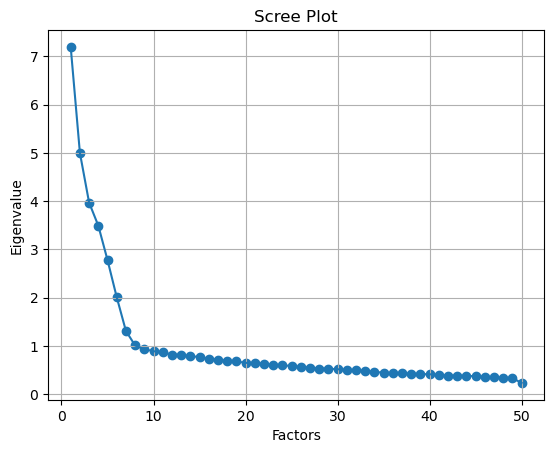

In [29]:
eigen_values, vectors = fa.get_eigenvalues()

# Scree plot of eigen values
plt.scatter(range(1,imp_big5.shape[1]+1),eigen_values)
plt.plot(range(1,imp_big5.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


# 8 Factors

In [37]:
fa = FactorAnalyzer()
fa.set_params(n_factors=8, rotation='varimax')
fa.fit(imp_big5)
loadings = fa.loadings_
factor_df=pd.DataFrame(loadings,index=imp_big5.columns)
fc_cols = ['Factor'+str(i) for i in range(1, 9)]
factor_df.columns = fc_cols
factor_df

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
EXT1,-0.667870,-0.027372,0.091277,0.006299,0.005221,0.072070,0.179201,0.085117
EXT2,0.705125,-0.005783,-0.105738,0.030632,0.017089,-0.003168,0.108558,0.126171
EXT3,-0.602776,-0.227100,0.282827,0.112417,0.024973,0.014848,0.218796,0.055797
EXT4,0.738551,0.121018,-0.017073,-0.018790,0.055514,0.028156,0.137374,0.043880
EXT5,-0.675206,-0.048108,0.232990,0.096812,0.085558,0.072643,0.145136,0.001895
EXT6,0.568908,0.073805,-0.106408,-0.010092,-0.127188,-0.127163,0.238068,0.152757
EXT7,-0.682703,-0.064939,0.182241,0.043162,0.045311,0.039418,0.171747,0.083345
EXT8,0.588923,0.051216,0.069595,0.078801,0.046389,-0.022273,0.120420,-0.013067
EXT9,-0.607476,-0.027142,0.009348,-0.026345,0.135813,0.107342,0.151434,0.095780
EXT10,0.671894,0.174537,-0.031305,-0.015424,0.046394,0.033314,0.126269,0.016051


In [46]:
fact1_cols = list(factor_df[factor_df['Factor1']>0.6].index)
fact2_cols = list(factor_df[factor_df['Factor2']>0.6].index)
fact3_cols = list(factor_df[factor_df['Factor3']>0.6].index)
fact4_cols = list(factor_df[factor_df['Factor4']>0.6].index)
fact5_cols = list(factor_df[factor_df['Factor5']>0.6].index)
fact6_cols = list(factor_df[factor_df['Factor6']>0.6].index)
fact7_cols = list(factor_df[factor_df['Factor7']>0.6].index)
fact8_cols = list(factor_df[factor_df['Factor8']>0.6].index)

In [47]:
print("Factor 1:", fact1_cols)
print("Factor 2:", fact2_cols)
print("Factor 3:", fact3_cols)
print("Factor 4:", fact4_cols)
print("Factor 5:", fact5_cols)
print("Factor 6:", fact6_cols)
print("Factor 7:", fact7_cols)
print("Factor 8:", fact8_cols)

Factor 1: ['EXT2', 'EXT4', 'EXT10']
Factor 2: ['EST1', 'EST3', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10']
Factor 3: ['AGR4', 'AGR9']
Factor 4: ['CSN1', 'CSN5', 'CSN9']
Factor 5: ['OPN1', 'OPN8']
Factor 6: ['OPN3', 'OPN10']
Factor 7: []
Factor 8: []


In [51]:
questions = pd.read_csv(r"C:\Users\Sanjay Sane\Cases of Factor Analysis\Big 5\Questions.csv",
                       sep="\t",index_col=0)


,Question
QNo,
EXT2,I don't talk a lot.
EXT4,I keep in the background.
EXT10,I am quiet around strangers.


### Factor 1:  Introvert

In [52]:
questions.loc[fact1_cols]

,Question
QNo,
EXT2,I don't talk a lot.
EXT4,I keep in the background.
EXT10,I am quiet around strangers.


### Factor 2: Sensitive Mind

In [53]:
questions.loc[fact2_cols]

,Question
QNo,
EST1,I get stressed out easily.
EST3,I worry about things.
EST6,I get upset easily.
EST7,I change my mood a lot.
EST8,I have frequent mood swings.
EST9,I get irritated easily.
EST10,I often feel blue.


### Factor 3: Empathetic

In [54]:
questions.loc[fact3_cols]

,Question
QNo,
AGR4,I sympathize with others' feelings.
AGR9,I feel others' emotions.


### Factor 4:  Conscientious

In [55]:
questions.loc[fact4_cols]

,Question
QNo,
CSN1,I am always prepared.
CSN5,I get chores done right away.
CSN9,I follow a schedule.


### Factor 5: Logophile

In [56]:
questions.loc[fact5_cols]

,Question
QNo,
OPN1,I have a rich vocabulary.
OPN8,I use difficult words.


### Factor 6:  Creative

In [57]:
questions.loc[fact6_cols]

,Question
QNo,
OPN3,I have a vivid imagination.
OPN10,I am full of ideas.
